<a href="https://colab.research.google.com/github/rahulmnair1997/LabelMaster_Sales_Forecasting/blob/main/EDA_books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import sys
import numpy as np
import warnings
from feature_selector import FeatureSelector
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('C:/Users/11602/OneDrive/Practicum/LabelMaster_Sales_Forecasting/data/Packaging_ext.csv', index_col=0)
df

,Year_Month,Sum of Sales,"FTR Truck Loadings (000s, SA)_freight_m_trucking",FTR Truck Loadings Index (2000=100)_freight_m_trucking,"FTR Active Truck Utilization (%, SA)_freight_m_trucking","Dry Van Trailer Loadings (000s, SA)_freight_m_trucking","Reefer Trailer Loadings (000s, SA)_freight_m_trucking","Flatbed Trailer Loadings (000s, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Bulk Trailer/Straight Truck Loadings (000s, SA)_freight_m_trucking",...,"East Coast Port Activity, Total TEUs_Exports_y.1","East Coast Port Activity, Total TEUs_SA Imports_y.1","Gulf Coast Port Activity, Total TEUs_Imports_y.1","Gulf Coast Port Activity, Total TEUs_Exports_y.1","Gulf Coast Port Activity, Total TEUs_SA Imports_y.1","Western Canadian Port Activity, Total TEUs_Imports_y.1","Western Canadian Port Activity, Total TEUs_Exports_y.1","Western Canadian Port Activity, Total TEUs_SA Imports_y.1",Total Intermodal (w/o FSC)_y.1,Total Intermodal (w/ FSC)_y.1
0,2008-01,381696.51,57633.608984,102.678075,88.294650,18021.824048,3940.638792,6425.307387,6915.782704,22330.056054,...,446657.730000,5.723749e+05,58486.560000,90322.590000,61444.608268,97597.00000,70230.000000,92712.867945,99.640213,112.481465
1,2008-02,430305.85,57175.659828,101.862208,87.998407,17917.808139,3927.115595,6323.986294,6836.939472,22169.810328,...,472359.530000,5.943458e+05,62079.760000,100410.660000,69356.289323,105664.00000,86567.000000,123918.281279,99.892838,112.865989
2,2008-03,451627.81,56814.700553,101.219136,87.790155,17835.922848,3922.853376,6352.228095,6758.129439,21945.566795,...,493039.820000,5.561473e+05,63169.270000,93384.280000,61534.312686,89275.00000,80451.000000,102763.241378,100.466949,113.715206
3,2008-04,467417.48,56916.813852,101.401057,89.639867,17713.172439,3978.633479,6304.602493,6858.428982,22061.976458,...,484342.050000,5.689482e+05,63221.100000,101642.940000,63038.826932,107793.00000,84739.000000,108298.068115,102.289780,115.952288
4,2008-05,462676.37,56194.246889,100.113756,89.134818,17561.485366,3990.692209,6213.659026,6804.610846,21623.799441,...,499498.010000,5.529787e+05,61657.850000,105424.640000,59864.174184,102278.00000,89548.000000,100455.980122,102.811441,117.038513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2020-09,980476.36,62170.174317,110.760265,90.587889,20315.722086,4381.188114,7049.924576,6556.745680,23866.593861,...,492325.048120,9.480849e+05,156153.318284,117576.128306,154165.434806,216790.00000,103129.000000,200875.373073,123.509489,131.952815
153,2020-10,922901.36,62870.759335,112.008404,94.367218,20404.155544,4436.920215,7199.060314,6523.796564,24306.826698,...,546879.252290,9.980584e+05,173631.303295,123604.184721,162787.138608,260826.00000,105255.000000,258626.771977,124.490623,133.554870
154,2020-11,293486.93,63237.027387,112.660934,95.404858,20455.350315,4457.161049,7260.723423,6528.943165,24534.849434,...,536326.504108,1.030347e+06,157277.954482,130627.239881,166005.768833,235655.91142,102805.965936,241663.526867,125.292560,134.506167
155,2020-12,557010.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df.drop(df.index[155:157])
df = df.set_index(keys='Year_Month')
df

,Sum of Sales,"FTR Truck Loadings (000s, SA)_freight_m_trucking",FTR Truck Loadings Index (2000=100)_freight_m_trucking,"FTR Active Truck Utilization (%, SA)_freight_m_trucking","Dry Van Trailer Loadings (000s, SA)_freight_m_trucking","Reefer Trailer Loadings (000s, SA)_freight_m_trucking","Flatbed Trailer Loadings (000s, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Bulk Trailer/Straight Truck Loadings (000s, SA)_freight_m_trucking","Food & Kindred Products (000s, SA)_freight_m_trucking",...,"East Coast Port Activity, Total TEUs_Exports_y.1","East Coast Port Activity, Total TEUs_SA Imports_y.1","Gulf Coast Port Activity, Total TEUs_Imports_y.1","Gulf Coast Port Activity, Total TEUs_Exports_y.1","Gulf Coast Port Activity, Total TEUs_SA Imports_y.1","Western Canadian Port Activity, Total TEUs_Imports_y.1","Western Canadian Port Activity, Total TEUs_Exports_y.1","Western Canadian Port Activity, Total TEUs_SA Imports_y.1",Total Intermodal (w/o FSC)_y.1,Total Intermodal (w/ FSC)_y.1
Year_Month,,,,,,,,,,,,,,,,,,,,,
2008-01,381696.51,57633.608984,102.678075,88.294650,18021.824048,3940.638792,6425.307387,6915.782704,22330.056054,7126.929795,...,446657.730000,5.723749e+05,58486.560000,90322.590000,61444.608268,97597.00000,70230.000000,92712.867945,99.640213,112.481465
2008-02,430305.85,57175.659828,101.862208,87.998407,17917.808139,3927.115595,6323.986294,6836.939472,22169.810328,7090.093356,...,472359.530000,5.943458e+05,62079.760000,100410.660000,69356.289323,105664.00000,86567.000000,123918.281279,99.892838,112.865989
2008-03,451627.81,56814.700553,101.219136,87.790155,17835.922848,3922.853376,6352.228095,6758.129439,21945.566795,7130.846968,...,493039.820000,5.561473e+05,63169.270000,93384.280000,61534.312686,89275.00000,80451.000000,102763.241378,100.466949,113.715206
2008-04,467417.48,56916.813852,101.401057,89.639867,17713.172439,3978.633479,6304.602493,6858.428982,22061.976458,7139.440571,...,484342.050000,5.689482e+05,63221.100000,101642.940000,63038.826932,107793.00000,84739.000000,108298.068115,102.289780,115.952288
2008-05,462676.37,56194.246889,100.113756,89.134818,17561.485366,3990.692209,6213.659026,6804.610846,21623.799441,7179.943436,...,499498.010000,5.529787e+05,61657.850000,105424.640000,59864.174184,102278.00000,89548.000000,100455.980122,102.811441,117.038513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07,456579.51,61469.059874,109.511184,89.962431,20072.391023,4379.187334,6993.332683,6571.127779,23453.021054,9375.896057,...,472910.156297,8.175415e+05,131560.759686,125276.157772,124175.287958,225515.00000,103172.000000,203343.596376,119.865470,128.935612
2020-08,318564.72,62140.797176,110.707928,90.641835,20379.910791,4404.415547,7096.862705,6601.260917,23658.347216,9520.297567,...,499597.784894,9.441444e+05,150026.806042,125319.157772,144616.508568,235159.00000,93979.000000,212554.287841,121.915166,130.511416
2020-09,980476.36,62170.174317,110.760265,90.587889,20315.722086,4381.188114,7049.924576,6556.745680,23866.593861,9472.590699,...,492325.048120,9.480849e+05,156153.318284,117576.128306,154165.434806,216790.00000,103129.000000,200875.373073,123.509489,131.952815


### Check whethere there are duplicate columns

In [7]:
def getDuplicateColumns(df): 
    duplicateColumnNames = set()  
    # Iterate through all the columns  
    # of dataframe 
    for x in range(df.shape[1]):     
        # Take column at xth index. 
        col = df.iloc[:, x] 
        # Iterate through all the columns in 
        # DataFrame from (x + 1)th index to 
        # last index 
        for y in range(x + 1, df.shape[1]): 
            # Take column at yth index. 
            otherCol = df.iloc[:, y] 
            # Check if two columns at x & y 
            # index are equal or not, 
            # if equal then adding  
            # to the set 
            if col.equals(otherCol): 
                duplicateColumnNames.add(df.columns.values[y])      
    # Return list of unique column names  
    # whose contents are duplicates. 
    return list(duplicateColumnNames) 

In [8]:
dups = getDuplicateColumns(df)
dups

['Intermodal Revenue Movements (IANA-ETSO)_International_x.1',
 'Unemployment Rate (%)_y.1',
 'MEMO: Tank Truckload (TL) Rates (rev/mi)_rates_m_trucking',
 'Gulf Coast Port Activity, Total TEUs_SA Imports_y',
 'Total Bus. Inventories/Retail Sales Ratio_x.1',
 'East Coast Port Activity, Total TEUs_SA Imports_x.1',
 'Intermodal Revenue Movements (IANA-ETSO)_Total_y.1',
 'Unemployment Rate (%)_y',
 'Unemployment Rate (%)_x',
 'Durable Goods Orders (Mil $)_x',
 'Western Canadian Port Activity, Total TEUs_SA Imports_y.1',
 "Payroll Employment (000's)_economics_m_trucking_trailer",
 'Change in Distillate Fuel Inventories_y',
 'Total Manufacturing Index_y.1',
 'Western Canadian Port Activity, Total TEUs_SA Imports_y',
 'Total IP Index_x',
 'N.A. Port Activity, Total TEUs_Exports_y.1',
 'West Coast Port Activity, Total TEUs_Imports_y.1',
 'Private Non-Residential Construction (Mil $)_x',
 'National Avg. Diesel/Gal._y',
 'ISM Manufacturing Index_economics_m_trucking_trailer',
 "Container Share 

In [9]:
df = df.drop(columns=dups)
df

,Sum of Sales,"FTR Truck Loadings (000s, SA)_freight_m_trucking",FTR Truck Loadings Index (2000=100)_freight_m_trucking,"FTR Active Truck Utilization (%, SA)_freight_m_trucking","Dry Van Trailer Loadings (000s, SA)_freight_m_trucking","Reefer Trailer Loadings (000s, SA)_freight_m_trucking","Flatbed Trailer Loadings (000s, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Bulk Trailer/Straight Truck Loadings (000s, SA)_freight_m_trucking","Food & Kindred Products (000s, SA)_freight_m_trucking",...,"West Coast Port Activity, Total TEUs_SA Imports_x","East Coast Port Activity, Total TEUs_Imports_x","East Coast Port Activity, Total TEUs_Exports_x","East Coast Port Activity, Total TEUs_SA Imports_x","Gulf Coast Port Activity, Total TEUs_Imports_x","Gulf Coast Port Activity, Total TEUs_Exports_x","Gulf Coast Port Activity, Total TEUs_SA Imports_x","Western Canadian Port Activity, Total TEUs_Imports_x","Western Canadian Port Activity, Total TEUs_Exports_x","Western Canadian Port Activity, Total TEUs_SA Imports_x"
Year_Month,,,,,,,,,,,,,,,,,,,,,
2008-01,381696.51,57633.608984,102.678075,88.294650,18021.824048,3940.638792,6425.307387,6915.782704,22330.056054,7126.929795,...,8.168066e+05,5.455093e+05,446657.730000,5.723749e+05,58486.560000,90322.590000,61444.608268,97597.00000,70230.000000,92712.867945
2008-02,430305.85,57175.659828,101.862208,87.998407,17917.808139,3927.115595,6323.986294,6836.939472,22169.810328,7090.093356,...,9.662124e+05,5.469667e+05,472359.530000,5.943458e+05,62079.760000,100410.660000,69356.289323,105664.00000,86567.000000,123918.281279
2008-03,451627.81,56814.700553,101.219136,87.790155,17835.922848,3922.853376,6352.228095,6758.129439,21945.566795,7130.846968,...,8.138837e+05,5.478672e+05,493039.820000,5.561473e+05,63169.270000,93384.280000,61534.312686,89275.00000,80451.000000,102763.241378
2008-04,467417.48,56916.813852,101.401057,89.639867,17713.172439,3978.633479,6304.602493,6858.428982,22061.976458,7139.440571,...,8.183477e+05,5.623923e+05,484342.050000,5.689482e+05,63221.100000,101642.940000,63038.826932,107793.00000,84739.000000,108298.068115
2008-05,462676.37,56194.246889,100.113756,89.134818,17561.485366,3990.692209,6213.659026,6804.610846,21623.799441,7179.943436,...,8.016842e+05,5.670828e+05,499498.010000,5.529787e+05,61657.850000,105424.640000,59864.174184,102278.00000,89548.000000,100455.980122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07,456579.51,61469.059874,109.511184,89.962431,20072.391023,4379.187334,6993.332683,6571.127779,23453.021054,9375.896057,...,9.768974e+05,8.590785e+05,472910.156297,8.175415e+05,131560.759686,125276.157772,124175.287958,225515.00000,103172.000000,203343.596376
2020-08,318564.72,62140.797176,110.707928,90.641835,20379.910791,4404.415547,7096.862705,6601.260917,23658.347216,9520.297567,...,9.985477e+05,9.981690e+05,499597.784894,9.441444e+05,150026.806042,125319.157772,144616.508568,235159.00000,93979.000000,212554.287841
2020-09,980476.36,62170.174317,110.760265,90.587889,20315.722086,4381.188114,7049.924576,6556.745680,23866.593861,9472.590699,...,9.583687e+05,9.808289e+05,492325.048120,9.480849e+05,156153.318284,117576.128306,154165.434806,216790.00000,103129.000000,200875.373073


### Feature Selection

In [10]:
X = df.drop(columns='Sum of Sales')
X.head()
y = df['Sum of Sales']
y

Year_Month
2008-01    381696.51
2008-02    430305.85
2008-03    451627.81
2008-04    467417.48
2008-05    462676.37
             ...    
2020-07    456579.51
2020-08    318564.72
2020-09    980476.36
2020-10    922901.36
2020-11    293486.93
Name: Sum of Sales, Length: 155, dtype: float64

In [11]:
fs=FeatureSelector(data=X, labels=y)

#### Check missing values

In [12]:
fs.identify_missing(missing_threshold=0.3)

78 features with greater than 0.30 missing values.



In [13]:
fs.ops['missing']

['Truckload (TL) Rates (rev/mi)_rates_m_trucking',
 'SP500_indicators_m_trucking',
 'EHS_indicators_m_trucking',
 'BACKLOG_Total_Trailer',
 'INVENTORY_Total_Trailer',
 'NET ORDERS_Total_Trailer',
 'FACTORY SHIPMENTS_Total_Trailer',
 'Backlog/ \r\nBuild Ratio_Total_Trailer',
 'Inventory/Factory Shipments Ratio_Total_Trailer',
 'BACKLOG_Dry_Van',
 'INVENTORY_Dry_Van',
 'NET ORDERS_Dry_Van',
 'FACTORY SHIPMENTS_Dry_Van',
 'Backlog/ \r\nBuild Ratio_Dry_Van',
 'Inventory/Factory Shipments Ratio_Dry_Van',
 'BACKLOG_Reefer_Van',
 'INVENTORY_Reefer_Van',
 'NET ORDERS_Reefer_Van',
 'FACTORY SHIPMENTS_Reefer_Van',
 'Backlog/ \r\nBuild Ratio_Reefer_Van',
 'Inventory/Factory Shipments Ratio_Reefer_Van',
 'BACKLOG_Flatbed',
 'INVENTORY_Flatbed',
 'NET ORDERS_Flatbed',
 'FACTORY SHIPMENTS_Flatbed',
 'Backlog/ \r\nBuild Ratio_Flatbed',
 'Inventory/Factory Shipments Ratio_Flatbed',
 'BACKLOG_Liquid_Tank',
 'INVENTORY_Liquid_Tank',
 'NET ORDERS_Liquid_Tank',
 'FACTORY SHIPMENTS_Liquid_Tank',
 'Backlog/

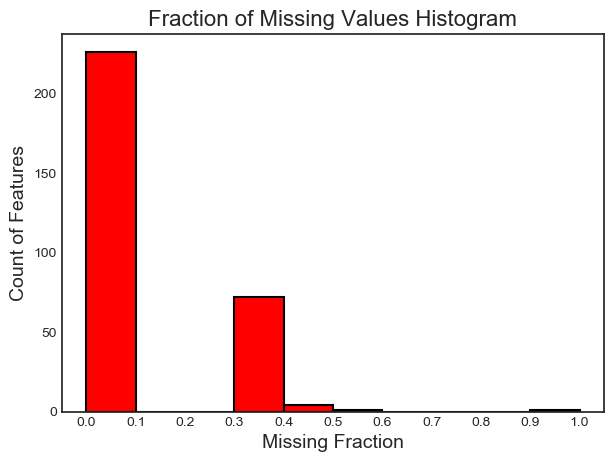

In [14]:
fs.plot_missing()

#### Check Collinearity

In [15]:
fs.identify_collinear(correlation_threshold=0.9)

178 features with a correlation magnitude greater than 0.90.



In [16]:
collinear_features = fs.ops['collinear']
fs.record_collinear.head(20)

,drop_feature,corr_feature,corr_value
0,FTR Truck Loadings Index (2000=100)_freight_m_...,"FTR Truck Loadings (000s, SA)_freight_m_trucking",1.000000
1,"Dry Van Trailer Loadings (000s, SA)_freight_m_...","FTR Truck Loadings (000s, SA)_freight_m_trucking",0.960822
2,"Dry Van Trailer Loadings (000s, SA)_freight_m_...",FTR Truck Loadings Index (2000=100)_freight_m_...,0.960822
3,"Flatbed Trailer Loadings (000s, SA)_freight_m_...","FTR Truck Loadings (000s, SA)_freight_m_trucking",0.994974
4,"Flatbed Trailer Loadings (000s, SA)_freight_m_...",FTR Truck Loadings Index (2000=100)_freight_m_...,0.994974
5,"Flatbed Trailer Loadings (000s, SA)_freight_m_...","Dry Van Trailer Loadings (000s, SA)_freight_m_...",0.957094
6,"Bulk Trailer/Straight Truck Loadings (000s, SA...","FTR Truck Loadings (000s, SA)_freight_m_trucking",0.992075
7,"Bulk Trailer/Straight Truck Loadings (000s, SA...",FTR Truck Loadings Index (2000=100)_freight_m_...,0.992075
8,"Bulk Trailer/Straight Truck Loadings (000s, SA...","Dry Van Trailer Loadings (000s, SA)_freight_m_...",0.933677
9,"Bulk Trailer/Straight Truck Loadings (000s, SA...","Flatbed Trailer Loadings (000s, SA)_freight_m_...",0.988296


#### Check zero importance features

In [17]:
fs.identify_zero_importance(task='regression', eval_metric='mse', early_stopping=False)

Training Gradient Boosting Model


42 features with zero importance after one-hot encoding.



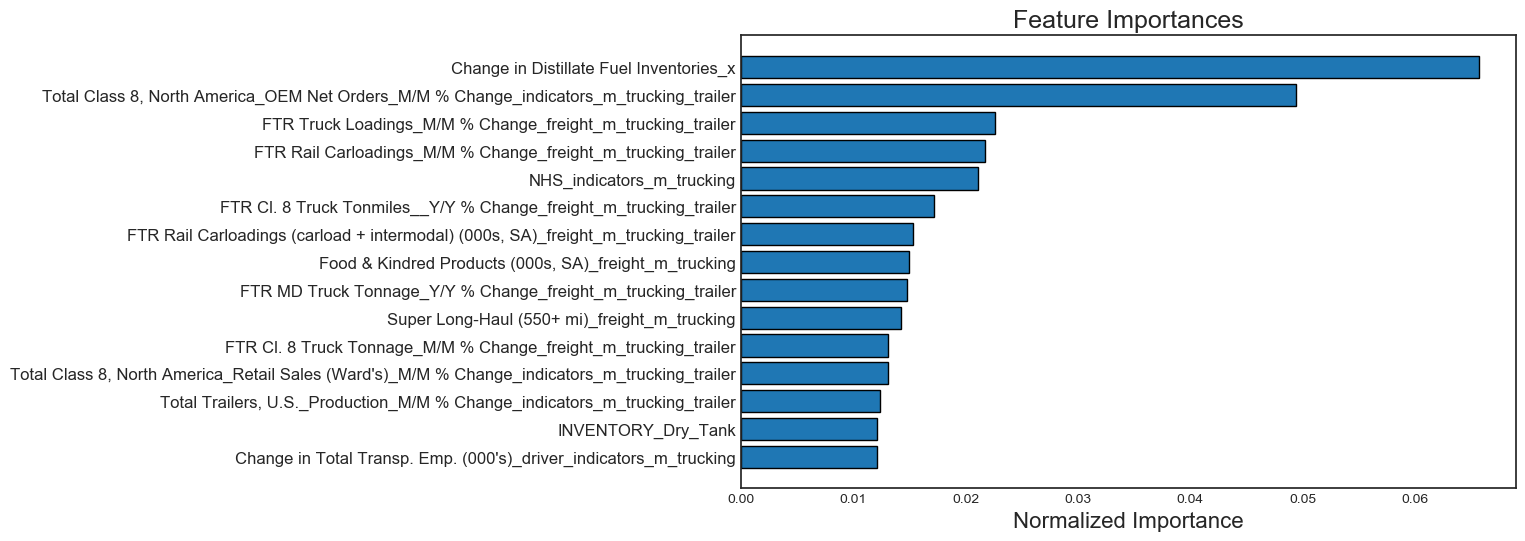

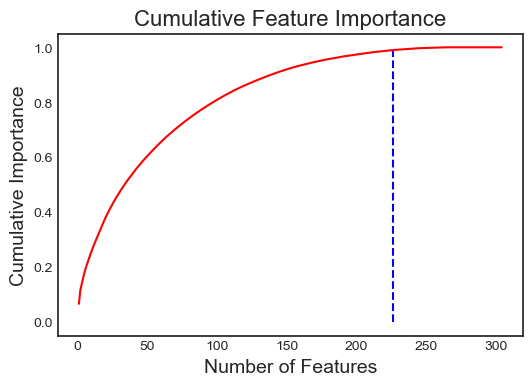

226 features required for 0.99 of cumulative importance


In [18]:
fs.plot_feature_importances(threshold=0.99)

#### Check Low Importance Features

In [19]:
fs.identify_low_importance(cumulative_importance=0.99)
fs.feature_importances.head(20)

225 features required for cumulative importance of 0.99 after one hot encoding.
79 features do not contribute to cumulative importance of 0.99.



,feature,importance,normalized_importance,cumulative_importance
0,Change in Distillate Fuel Inventories_x,351.0,0.065681,0.065681
1,"Total Class 8, North America_OEM Net Orders_M/...",264.0,0.049401,0.115082
2,FTR Truck Loadings_M/M % Change_freight_m_truc...,121.0,0.022642,0.137725
3,FTR Rail Carloadings_M/M % Change_freight_m_tr...,116.0,0.021707,0.159431
4,NHS_indicators_m_trucking,113.0,0.021145,0.180576
5,FTR Cl. 8 Truck Tonmiles__Y/Y % Change_freight...,92.0,0.017216,0.197792
6,FTR Rail Carloadings (carload + intermodal) (0...,82.0,0.015344,0.213136
7,"Food & Kindred Products (000s, SA)_freight_m_t...",80.0,0.014970,0.228106
8,FTR MD Truck Tonnage_Y/Y % Change_freight_m_tr...,79.0,0.014783,0.242889
9,Super Long-Haul (550+ mi)_freight_m_trucking,76.0,0.014222,0.257111


#### Remove features

In [20]:
feature_selected = fs.remove(methods=['missing','collinear','zero_importance','low_importance'])
features = np.append(list(['Sum of Sales']),list(feature_selected.columns))
df = df[features]
df

Removed 225 features.


,Sum of Sales,"FTR Truck Loadings (000s, SA)_freight_m_trucking","FTR Active Truck Utilization (%, SA)_freight_m_trucking","Reefer Trailer Loadings (000s, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Chemicals & Allied Products (000s, SA)_freight_m_trucking",Spot TL Rates (w/o FSC)_rates_m_trucking,Contract TL Rates w/Fuel_rates_m_trucking,Total LTL (w/ FSC)_rates_m_trucking,Contract TL Tank Rates (w/o FSC)_rates_m_trucking,...,BUILD FOR_All_Other,Change in Distillate Fuel Inventories_x,Intermodal Revenue Movements (IANA-ETSO)_Total_x,FTR Intermodal Competitive Index_Intermodal Competitive Index (0=Neutral)_x,U.S. Origin Intermodal Volumes_International_x,Canada Origin Intermodal Volumes_Domestic_x,"N.A. Port Activity, Total TEUs_Exports_x","West Coast Port Activity, Total TEUs_Exports_x","Gulf Coast Port Activity, Total TEUs_Exports_x","Western Canadian Port Activity, Total TEUs_Exports_x"
Year_Month,,,,,,,,,,,,,,,,,,,,,
2008-01,381696.51,57633.608984,88.294650,3940.638792,6915.782704,3013.868684,96.932289,112.305447,114.408275,99.995901,...,969.0,-2981.0,1156094.0,3.341993,557011.0,46969.0,1.035742e+06,428531.270000,90322.590000,70230.000000
2008-02,430305.85,57175.659828,87.998407,3927.115595,6836.939472,2975.285847,99.719858,112.181182,114.867841,100.276486,...,1104.0,-13327.0,1088826.0,2.285576,501961.0,44924.0,1.138045e+06,478707.330000,100410.660000,86567.000000
2008-03,451627.81,56814.700553,87.790155,3922.853376,6758.129439,2941.079313,103.347853,111.302493,117.070858,99.727612,...,1158.0,-9852.0,1082825.0,1.924076,481100.0,46727.0,1.167742e+06,500866.450000,93384.280000,80451.000000
2008-04,467417.48,56916.813852,89.639867,3978.633479,6858.428982,2906.591249,111.718085,110.502609,122.811123,99.057287,...,931.0,-733.0,1158286.0,5.986521,528843.0,53497.0,1.156788e+06,486063.840000,101642.940000,84739.000000
2008-05,462676.37,56194.246889,89.134818,3990.692209,6804.610846,2872.185063,117.525703,110.767343,123.968232,97.828232,...,991.0,6890.0,1184144.0,7.940801,541259.0,53653.0,1.185090e+06,490618.980000,105424.640000,89548.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07,456579.51,61469.059874,89.962431,4379.187334,6571.127779,2639.040651,115.128696,137.122933,113.578198,115.191063,...,1359.0,2134.0,1526490.0,-0.192121,513074.0,57503.0,1.095134e+06,393775.832112,125276.157772,103172.000000
2020-08,318564.72,62140.797176,90.641835,4404.415547,6601.260917,2676.666422,129.107598,139.852134,115.812566,114.911925,...,1671.0,1353.0,1575928.0,0.625716,546740.0,56478.0,1.108304e+06,389408.103791,125319.157772,93979.000000
2020-09,980476.36,62170.174317,90.587889,4381.188114,6556.745680,2600.808117,136.100117,141.491235,117.464895,115.470202,...,1711.0,-7196.0,1617044.0,5.475578,557748.0,59269.0,1.099329e+06,386298.700253,117576.128306,103129.000000


In [21]:
#df.to_csv('Packaging_ext_fs.csv')

In [23]:
%matplotlib inline
import pandas as pd # for using pandas daraframe
import numpy as np # for som math operations
from sklearn.preprocessing import StandardScaler # for standardizing the Data
from sklearn.decomposition import PCA # for PCA calculation
import matplotlib.pyplot as plt # for plotting

In [30]:
X = df.values # getting all values as a matrix of dataframe 
sc = StandardScaler() # creating a StandardScaler object
X_std = sc.fit_transform(X) # standardizing the data

In [31]:
pca = PCA()
X_pca = pca.fit(X_std)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [40]:
np.isnan(X_std.any())
np.isfinite(X_std.all())

True